**running time = 41 min** Intel i5-2450M 2500MHz / 4096Mb Memory / AMD Radeon HD 7600M

Напишем симуляцию слота. Рассчитаем на данной симуляции указанные выходные данные.

Описание слота																							
Имеем 5 барабанов. Игрок видит по 3 символа с каждого барабана. Барабанные ленты состоят из 3 типов high-символов и 4 типов low-символов.																							
Выигрыши считываются с 25 линий. Выигрыш выплачивается, если игроку выпала комбинация из 3, 4 или 5 одинаковых символов, следующих друг за другом.																							
Комбинации с линии считываются слева направо, начиная с крайнего левого символа.																							
Чтобы совершить один спин, игрок ставит по одной монете на каждую линию, т.е. 25 монет.									

					
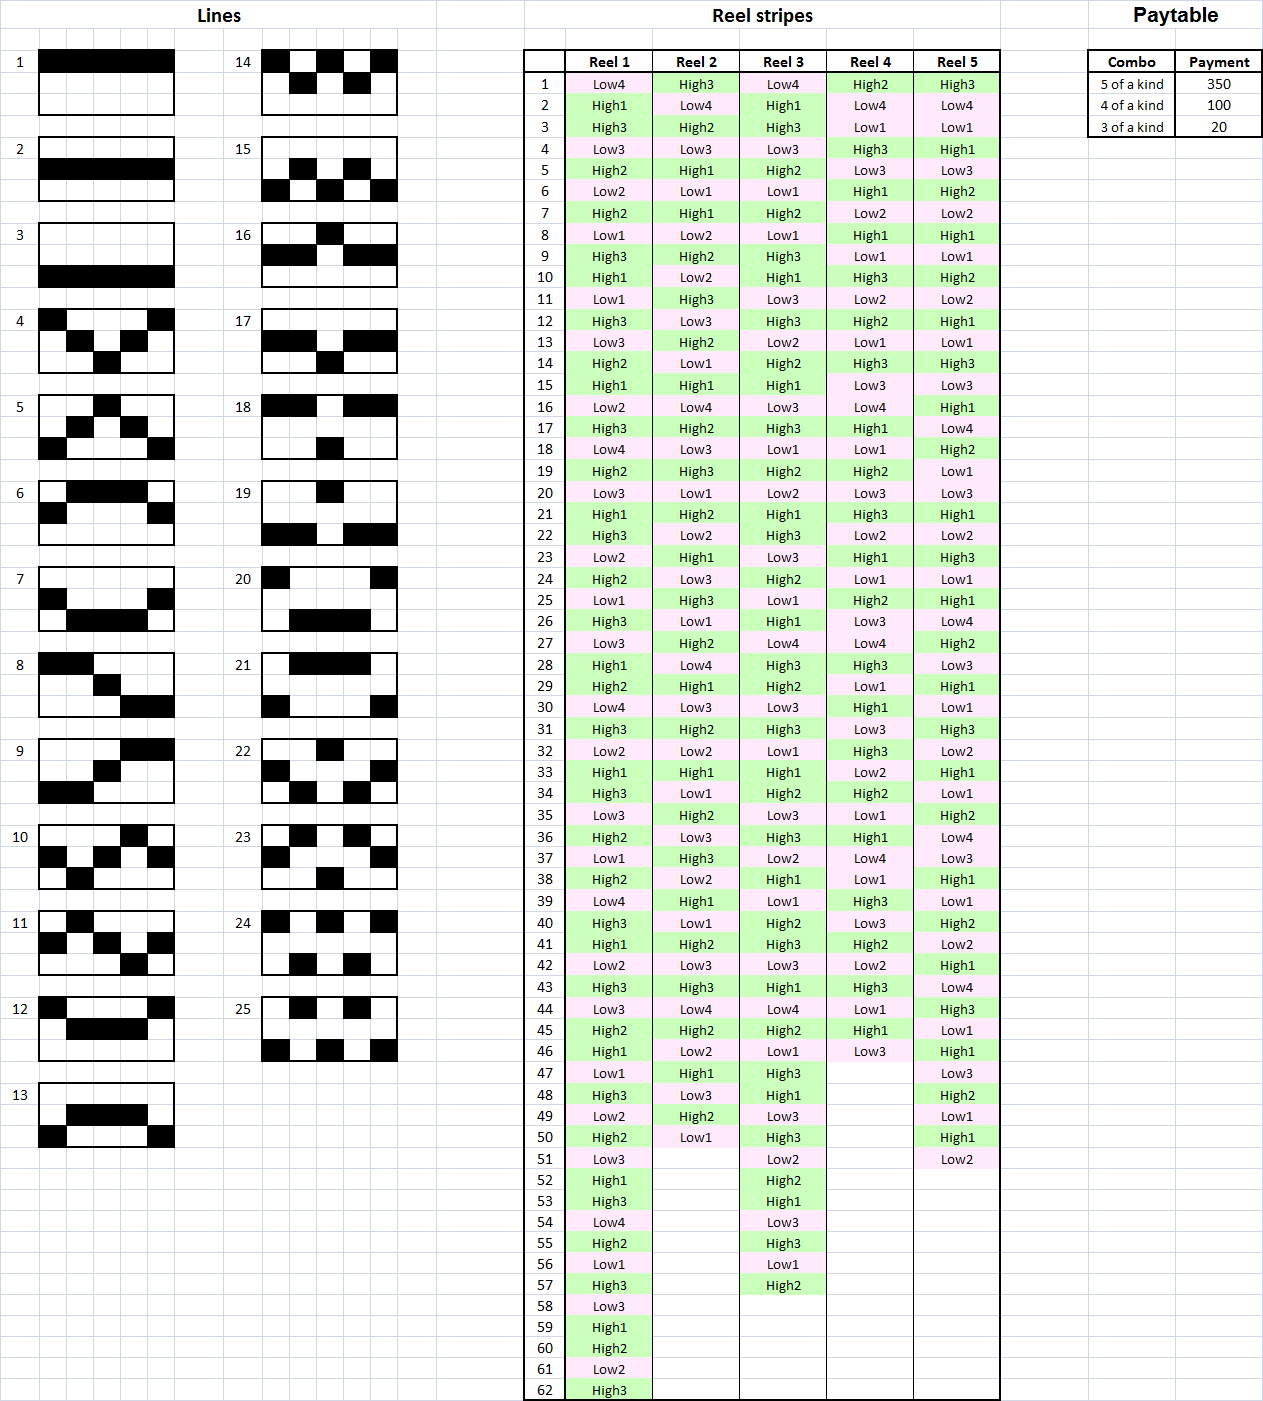

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
stripes = pd.read_csv('stripes.csv', delimiter='\t')
# _dict = {'High1': 1, 'High2': 2, 'High3':3, 'Low1': 4, 'Low2': 5, 'Low3': 6, 'Low4': 7}
# stripes = stripes.apply(lambda _: _.map(_dict))
stripes.count()

Reel 1    62
Reel 2    50
Reel 3    57
Reel 4    46
Reel 5    51
dtype: int64

In [3]:
reels = {}
for i in range(1,6):
    reels[i] = stripes[f'Reel {i}'].dropna()
    print(reels[i].shape)

(62,)
(50,)
(57,)
(46,)
(51,)


In [4]:
combinations = {}
combinations[1]  = tuple(map(tuple, np.array([[0,0,0,0,0],[0,1,2,3,4]]).T))
combinations[2]  = tuple(map(tuple, np.array([[1,1,1,1,1],[0,1,2,3,4]]).T))
combinations[3]  = tuple(map(tuple, np.array([[2,2,2,2,2],[0,1,2,3,4]]).T))
combinations[4] = tuple(map(tuple, np.array([[0,1,2,1,0],[0,1,2,3,4]]).T))
combinations[5] = tuple(map(tuple, np.array([[2,1,0,1,2],[0,1,2,3,4]]).T))
combinations[6] = tuple(map(tuple, np.array([[1,0,0,0,1],[0,1,2,3,4]]).T))
combinations[7] = tuple(map(tuple, np.array([[1,2,2,2,1],[0,1,2,3,4]]).T))
combinations[8] = tuple(map(tuple, np.array([[0,0,1,2,2],[0,1,2,3,4]]).T))
combinations[9] = tuple(map(tuple, np.array([[2,2,1,0,0],[0,1,2,3,4]]).T))
combinations[10] = tuple(map(tuple, np.array([[1,2,1,0,1],[0,1,2,3,4]]).T))
combinations[11] = tuple(map(tuple, np.array([[1,0,1,2,1],[0,1,2,3,4]]).T))
combinations[12] = tuple(map(tuple, np.array([[0,1,1,1,0],[0,1,2,3,4]]).T))
combinations[13] = tuple(map(tuple, np.array([[2,1,1,1,2],[0,1,2,3,4]]).T))
combinations[14] = tuple(map(tuple, np.array([[0,1,0,1,0],[0,1,2,3,4]]).T))
combinations[15] = tuple(map(tuple, np.array([[2,1,2,1,2],[0,1,2,3,4]]).T))
combinations[16] = tuple(map(tuple, np.array([[1,1,0,1,1],[0,1,2,3,4]]).T))
combinations[17] = tuple(map(tuple, np.array([[1,1,2,1,1],[0,1,2,3,4]]).T))
combinations[18] = tuple(map(tuple, np.array([[0,0,2,0,0],[0,1,2,3,4]]).T))
combinations[19] = tuple(map(tuple, np.array([[2,2,0,2,2],[0,1,2,3,4]]).T))
combinations[20] = tuple(map(tuple, np.array([[0,2,2,2,0],[0,1,2,3,4]]).T))
combinations[21] = tuple(map(tuple, np.array([[2,0,0,0,2],[0,1,2,3,4]]).T))
combinations[22] = tuple(map(tuple, np.array([[1,2,0,2,1],[0,1,2,3,4]]).T))
combinations[23] = tuple(map(tuple, np.array([[1,0,2,0,1],[0,1,2,3,4]]).T))
combinations[24] = tuple(map(tuple, np.array([[0,2,0,2,0],[0,1,2,3,4]]).T))
combinations[25] = tuple(map(tuple, np.array([[2,0,2,0,2],[0,1,2,3,4]]).T))

In [6]:
gains = {1:0, 2:0, 3:20, 4:100, 5:350}
comb_counter = {}
def get_win(roll):
    win_sum = 0
    for comb in combinations.values():
        s = roll.item(comb[0])
        counter = 1
        for i in range(1,5):
            new_s = roll.item(comb[i])
            if new_s==s:
                counter+=1
            else:
                break
                           
        if(counter>2):
            cc = (' '.join((s,str(counter))))
            if(cc in comb_counter.keys()):
                comb_counter[cc] += 1
            else:
                comb_counter[cc] = 1
        win_sum += gains[counter]
        
    return win_sum

In [7]:
def get_down(lim, idx):
    if(idx>=lim):
        idx=0
    else:
        idx+=1
    return idx

def roll():
    line1 = []
    line2 = []
    line3 = []
    for i in range(1,6):
        reel = reels[i]
        lim = reel.shape[0]-1
        idx = randint(0, lim)
        line1.append(reel[idx])
        idx = get_down(lim, idx)
        line2.append(reel[idx])
        idx = get_down(lim, idx)
        line3.append(reel[idx])
    roll = np.vstack((line1,line2,line3))
    return get_win(roll)

In [8]:
roll()

20

### Посчитаем RTP (return to player)  какой процент от ставки игрок выигрывает в слоте (среднее значение: выплата со спина/ставка на спин, %)

In [9]:
pay = 25
n = 500000
rtp = 0
for i in range(n):
    rtp += roll()/pay
    
print(rtp/n)

0.9378479999964833


### Посчитаем Combination hit rates - частота выпадения каждой комбинации (1 раз на N спинов)

In [30]:
answer3 = {k:v/n*100 for k,v in comb_counter.items()}
print('answer 3: ')
display(answer3)
#Например High1 High1 High1 * *  выпадает 9.5462 раз в 100 спиниов
#         High1 High1 High1 High1 *  выпадает 1.3146 раз в 100 спиниов

answer 3: 


{'High1 3': 9.5462,
 'High1 4': 1.3146,
 'High1 5': 0.41359999999999997,
 'High2 3': 17.791,
 'High2 4': 2.3606,
 'High2 5': 0.35760000000000003,
 'High3 3': 11.7566,
 'High3 4': 2.2526,
 'High3 5': 0.23839999999999997,
 'Low1 3': 3.842,
 'Low1 4': 0.7556,
 'Low1 5': 0.17880000000000001,
 'Low2 3': 2.0846,
 'Low2 4': 0.2166,
 'Low2 5': 0.031599999999999996,
 'Low3 3': 6.9506,
 'Low3 4': 1.1096,
 'Low3 5': 0.14959999999999998,
 'Low4 3': 0.7532,
 'Low4 4': 0.0702,
 'Low4 5': 0.008}

### Посчитаем количество спинов, через которое игрок проигрывает сумму в 100 ставок

In [100]:
%%time
game_numbers = []
for j in range(5000):
    cash = 25*100
    i = 0
    while True:
        if cash<25:
            break
        i+=1
        cash += roll() - 25
    game_numbers.append(i)

Wall time: 38min 58s


In [103]:
np.median(game_numbers)

1212.0